# K-Nearest Neighbors (KNN)
- **Euclidean Distance** calculates the straight-line distance between points.
- **KNN for Classification** predicts the most frequent class label among the \( k \)-nearest neighbors.
- **KNN for Regression** predicts the average value of the \( k \)-nearest neighbors.

In [57]:
# Checking if pip is up to date
import subprocess
try:
    # This will fail if you are using p
    subprocess.check_call(['pip', 'install', '--upgrade', 'pip'])
    print('pip upgraded successfully!')
except subprocess.CalledProcessError as e:
    print('Error occure: {e}')
# Creating array with required libraries
required_libraries = ['numpy', 'pandas', 'matplotlib', 'scikit-learn', 'seaborn']
# Loop to check if libraries are installed
for library in required_libraries:
    try:
        __import__(library)
        print(f'Libray: {library} is already installed')
    except ImportError:
        print(f'Installing {library}')
        try:
            subprocess.check_call(['pip', 'install', library])
        except subprocess.CalledProcessError as e:
            print(f'Error occure {e}')

# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Instead of creating DataFrame
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
print(f'Libraries imported successfull!')

Error occure: {e}
Libray: numpy is already installed
Libray: pandas is already installed
Libray: matplotlib is already installed
Installing scikit-learn
Libray: seaborn is already installed
Libraries imported successfull!


In [58]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['species'] = data.target
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [59]:
# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=21, stratify=data.target)
# Saving test results
train_accuracies = {}
test_accuracies = {}
# Range of tests
neighbors = np.arange(1, 15)
for n in neighbors:
    # Creating Model
    knn = KNeighborsClassifier(n_neighbors=n)
    # Training model
    knn.fit(X_train, y_train)
    # Assign accurace of training and test
    train_accuracies[n] = knn.score(X_train, y_train)
    test_accuracies[n] = knn.score(X_test, y_test)

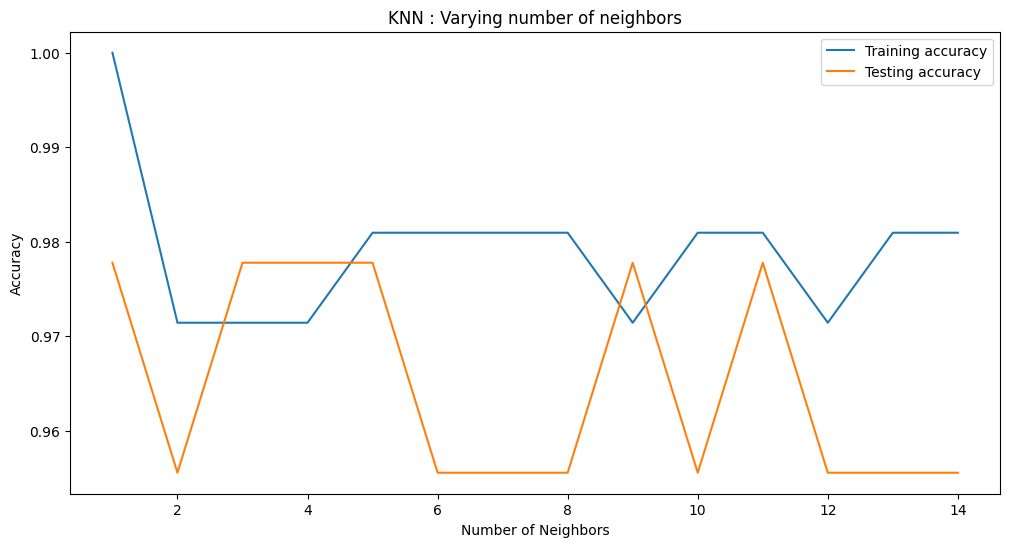

In [60]:
# Plotting accuraces
plt.figure(figsize=(12,6))
plt.title("KNN : Varying number of neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [61]:

optimal_train_n = max(train_accuracies, key=train_accuracies.get)
optimal_test_n = max(test_accuracies, key=test_accuracies.get)

print(f'Optimal Train accuracy: {train_accuracies[optimal_train_n]} with n_neighbors={optimal_train_n}')
print(f'Optimal Test accuracy: {test_accuracies[optimal_test_n]} with n_neighbors={optimal_test_n}')


Optimal Train accuracy: 1.0 with n_neighbors=1
Optimal Test accuracy: 0.9777777777777777 with n_neighbors=1
